In [ ]:
# primary_results.csv
# county_facts.csv

In [4]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 두 개의 데이터 셋
- primary : 미국 내 주-카운티별 각 정당, 후보자의 데이터와 득표율 데이터
- counties : primary의 칼럼 중 fips라는 코드를 식별자로 하여 각 유권자별 데이터 (fips-유색인종)

In [5]:
# 데이터 불러오기, encoding='utf-8', sep=','
primary = pd.read_csv("D:/python3/data/primary_results.csv")
counties = pd.read_csv("D:/python3/data/county_facts.csv")

### preprocessing : 전처리
### EDA(탐색적 데이터 분석)

In [8]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [11]:
primary.shape

(13212, 8)

In [12]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 8 columns):
state                 13212 non-null object
state_abbreviation    13212 non-null object
county                13212 non-null object
fips                  13212 non-null int64
party                 13212 non-null object
candidate             13212 non-null object
votes                 13212 non-null int64
fraction_votes        13212 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 825.8+ KB


In [13]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [15]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [14]:
counties.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [16]:
counties.shape

(3195, 54)

## 데이터 분석하기 : 분석결과를 시각화하기

### 1. 각 후보별 전체지역 득표수를 계산하시오.
- candidate: 후보자
- votes: 득표수

In [17]:
# ~별로 ~를 계산한다. (group)  /row- group의 기준열 /columns- 통계데이터
# 통계량을 계산할 컬럼명.groupby('그룹화할 기준컬럼명')
# step1. candidate의 unique 확인
primary['candidate'].unique()

array(['Donald Trump', 'Ted Cruz', 'Marco Rubio', 'Ben Carson',
       'John Kasich', 'Hillary Clinton', 'Bernie Sanders',
       'Carly Fiorina', 'Rand Paul', 'Mike Huckabee', 'Rick Santorum',
       'Jeb Bush', 'Chris Christie', "Martin O'Malley", ' Uncommitted',
       ' No Preference'], dtype=object)

In [19]:
# step2. 후보별 득표수의 합계
candidate_to_votes_s = primary.groupby('candidate')['votes'].sum()
candidate_to_votes_s

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [20]:
# step3. 득표수별로 오름차순으로 정렬하는 작업
candidate_to_votes_s = primary.groupby('candidate')['votes'].sum().sort_values()
candidate_to_votes_s

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

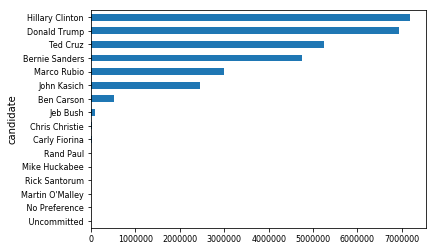

In [22]:
# step4. 후보별 전체지역 득표수를 정렬한 결과를 이용하여 수평막대그래프를 그린다
candidate_to_votes_s.plot(kind='barh', fontsize=8)

### 2. 각 주별, 공화당과 민주당의 득표비율을 계산하시오.
- state : 주
- party : 정당

In [ ]:
# 각 주별 => state 기준열1
# 공화당과 민주당 => party 기준열2
# 득표수 : votes
# 득표비율 = 해당 득표수 / 전체 득표수

In [23]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [24]:
primary['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Florida', 'Georgia',
       'Idaho', 'Illinois', 'Iowa', 'Kentucky', 'Louisiana', 'Maine',
       'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska',
       'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'New Hampshire'], dtype=object)

In [25]:
primary['party'].unique()

array(['Republican', 'Democrat'], dtype=object)

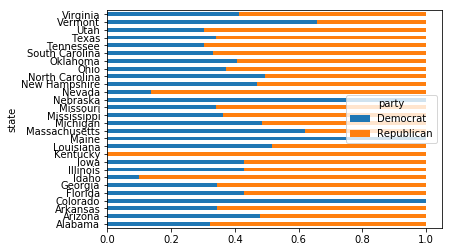

In [31]:
# step1. 각 주별 - 공화당/민주당 - 득표수의 합
state_party_votes_s = primary.groupby(['state','party'])['votes'].sum()
# step2. 비율을 구하기 위해 각 주의 전체 득표수를 구하는 작업
state_to_votes_s = primary.groupby('state')['votes'].sum()
# step3. step1에서 구한 Series를 step2에서 구한 Series로 나눠준다.
# 일반적으로 계층적인 인덱스를 이용하여 연산을 수행할 때 첫번째 인덱스가 기준
state_party_to_votes_pct = state_party_votes_s / state_to_votes_s
# step4. 비율을 시각화
# 멀티인덱스를 시각화할 때 unstack()를 이용하여 하위인덱스를 컬럼으로 올린다.
state_party_to_votes_pct.unstack().plot(kind='barh', stacked=True)#, fontsize=8)

In [32]:
# primary['vote_r'] = primary['votes']/primary['votes'].sum() #*100
# vote = primary['votes_r'].groupby([primary['state'], primary['party']])
# vote.plot(kind='barh', fontsize=8)

### 3. 사용자 정의 함수를 활용하여 각 county별, 당선된 후보의 백인유권자 비율을 계산하시오.
- 유권자 : fips
- 정당 : party
- 후보자 : candidate

In [37]:
# 당선된 후보 = 득표수가 많은 후보 = 투표열을 내림차순 정렬 -> 1번째행 당선후보
func = lambda agg_df: agg_df.sort_values(by='votes', ascending=False).iloc[0]

In [38]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,vote_ratio,vote_r
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445,0.000178,0.000178
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205,0.000082,0.000082
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148,0.000059,0.000059
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146,0.000058,0.000058
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035,0.000014,0.000014


In [41]:
winners = primary.groupby('fips').agg(func)
winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,vote_ratio,vote_r
fips,,,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,0.000178,0.000178
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,0.000781,0.000781
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,0.000085,0.000085
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,0.000065,0.000065
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,0.000244,0.000244


In [42]:
counties['RHI825214'].head()

0    62.1
1    66.2
2    75.6
3    83.0
4    46.6
Name: RHI825214, dtype: float64

In [45]:
winners_county_races = pd.merge(winners, counties[['fips', 'RHI825214']],
                               left_index=True, right_on='fips', how='left')
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,vote_ratio,vote_r,fips,RHI825214
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,0.000178,0.000178,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,0.000781,0.000781,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,0.000085,0.000085,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,0.000065,0.000065,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,0.000244,0.000244,1009,87.8


In [46]:
winners_county_races = winners_county_races.rename(columns={'RHI825214':'white_pct'})
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,vote_ratio,vote_r,fips,white_pct
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,0.000178,0.000178,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,0.000781,0.000781,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,0.000085,0.000085,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,0.000065,0.000065,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,0.000244,0.000244,1009,87.8


In [49]:
# party와 candidate를 그룹화한 후, 백인유권자의 비율에 대한 평균
winners_county_white_pct = winners_county_races.groupby(['party', 'candidate'])['white_pct'].mean()
winners_county_white_pct

party       candidate      
Democrat    Bernie Sanders     81.944030
            Hillary Clinton    56.856920
Republican  Ben Carson         81.100000
            Donald Trump       83.235638
            John Kasich        89.226415
            Marco Rubio        78.883333
            Ted Cruz           74.164665
Name: white_pct, dtype: float64

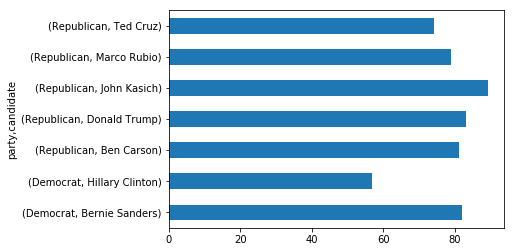

In [50]:
winners_county_white_pct.plot(kind='barh')